In [1]:
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 16s 1us/step


In [3]:
print('Training data : {}'.format(x_train.shape))
print('Training labels : {}'.format(y_train.shape))

Training data : (60000, 28, 28)
Training labels : (60000,)


In [4]:
print('Testing data : {}'.format(x_test.shape))
print('Testing data : {}'.format(y_test.shape))

Testing data : (10000, 28, 28)
Testing data : (10000,)


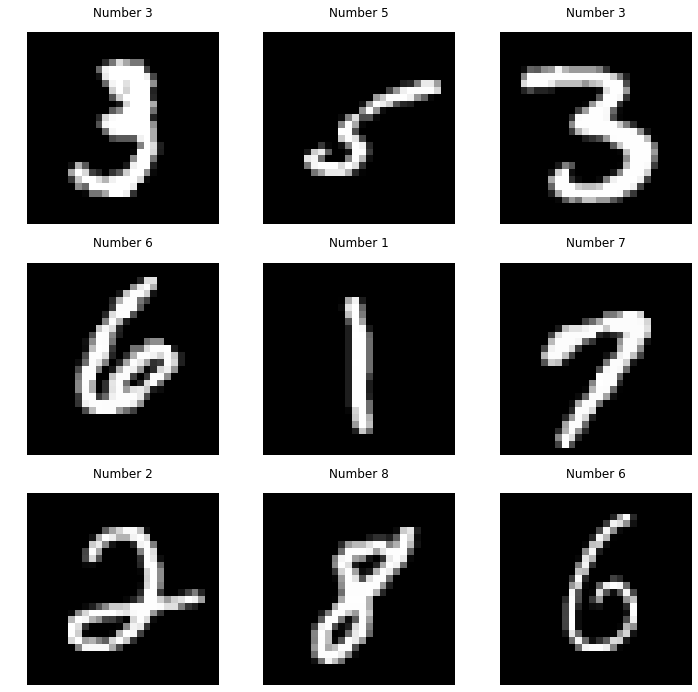

In [8]:
%matplotlib inline
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[10 + i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[10 + i]))
fig.show()

In [9]:
X = x_train.reshape(len(x_train), -1)
Y = y_train
X = X.astype(float)/255.

In [21]:
from sklearn.cluster import MiniBatchKMeans
n_digits = len(np.unique(y_test))
print(n_digits)
kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [55]:
kmeans.labels_[:20]

array([2, 6, 1, 7, 1, 3, 0, 8, 0, 2, 8, 7, 8, 9, 0, 5, 3, 2, 0, 5])

In [60]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        #print(index)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        #print(labels)
        #print('Cluster : {}, Label : {}'.format(i, np.argmax(counts)))
        print(inferred_labels)
    return inferred_labels



def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i,cluster in enumerate(X_labels):
        for key,value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

In [61]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
print(X_clusters)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

{1: [0]}
{1: [0], 4: [1]}
{1: [0], 4: [1], 5: [2]}
{1: [0], 4: [1], 5: [2], 2: [3]}
{1: [0], 4: [1], 5: [2], 2: [3], 0: [4]}
{1: [0], 4: [1], 5: [2], 2: [3], 0: [4], 7: [5]}
{1: [0], 4: [1], 5: [2], 2: [3], 0: [4, 6], 7: [5]}
{1: [0, 7], 4: [1], 5: [2], 2: [3], 0: [4, 6], 7: [5]}
{1: [0, 7], 4: [1], 5: [2], 2: [3], 0: [4, 6], 7: [5], 3: [8]}
{1: [0, 7], 4: [1], 5: [2], 2: [3], 0: [4, 6], 7: [5], 3: [8], 6: [9]}
[2 6 1 ... 2 2 2]
[5 0 4 1 4 2 1 3 1 5 3 1 3 6 1 7 2 5 1 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [62]:
from sklearn import metrics
def calculate_metrics(estimator, data ,labels):
    print('No.of clusters : {}'.format(estimator.n_clusters))
    print('Inertia : {}'.format(estimator.inertia_))
    print('Homogeneity : {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [64]:
clusters = [10, 16, 36, 64, 144, 256]
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    calculate_metrics(estimator, X, Y)
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    print('Accuracy : {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

No.of clusters : 10
Inertia : 2394757.654179304
Homogeneity : 0.41963619638612715
{8: [0]}
{8: [0], 1: [1]}
{8: [0], 1: [1], 7: [2]}
{8: [0], 1: [1, 3], 7: [2]}
{8: [0], 1: [1, 3], 7: [2], 2: [4]}
{8: [0], 1: [1, 3], 7: [2], 2: [4], 0: [5]}
{8: [0], 1: [1, 3], 7: [2], 2: [4], 0: [5], 4: [6]}
{8: [0], 1: [1, 3], 7: [2], 2: [4], 0: [5], 4: [6], 6: [7]}
{8: [0], 1: [1, 3], 7: [2, 8], 2: [4], 0: [5], 4: [6], 6: [7]}
{8: [0], 1: [1, 3], 7: [2, 8], 2: [4], 0: [5], 4: [6], 6: [7], 3: [9]}
Accuracy : 0.5070666666666667

No.of clusters : 16
Inertia : 2208474.51182911
Homogeneity : 0.5760376835669816
{4: [0]}
{4: [0], 3: [1]}
{4: [0], 3: [1], 1: [2]}
{4: [0], 3: [1], 1: [2], 9: [3]}
{4: [0], 3: [1], 1: [2], 9: [3], 2: [4]}
{4: [0], 3: [1], 1: [2], 9: [3], 2: [4], 0: [5]}
{4: [0], 3: [1], 1: [2], 9: [3], 2: [4], 0: [5], 8: [6]}
{4: [0], 3: [1], 1: [2], 9: [3], 2: [4], 0: [5], 8: [6], 5: [7]}
{4: [0], 3: [1], 1: [2], 9: [3], 2: [4], 0: [5], 8: [6], 5: [7, 8]}
{4: [0], 3: [1], 1: [2], 9: [3], 2: [4

Accuracy : 0.7778666666666667

No.of clusters : 144
Inertia : 1630987.8081955556
Homogeneity : 0.8107231517494788
{5: [0]}
{5: [0], 9: [1]}
{5: [0], 9: [1], 2: [2]}
{5: [0], 9: [1], 2: [2], 1: [3]}
{5: [0], 9: [1], 2: [2], 1: [3], 0: [4]}
{5: [0], 9: [1, 5], 2: [2], 1: [3], 0: [4]}
{5: [0], 9: [1, 5], 2: [2, 6], 1: [3], 0: [4]}
{5: [0], 9: [1, 5], 2: [2, 6], 1: [3, 7], 0: [4]}
{5: [0], 9: [1, 5], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8]}
{5: [0], 9: [1, 5], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8], 7: [9]}
{5: [0], 9: [1, 5], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8], 7: [9, 10]}
{5: [0, 11], 9: [1, 5], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8], 7: [9, 10]}
{5: [0, 11], 9: [1, 5], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8, 12], 7: [9, 10]}
{5: [0, 11], 9: [1, 5], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8, 12], 7: [9, 10, 13]}
{5: [0, 11], 9: [1, 5, 14], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8, 12], 7: [9, 10, 13]}
{5: [0, 11], 9: [1, 5, 14, 15], 2: [2, 6], 1: [3, 7], 0: [4], 6: [8, 12], 7: [9, 10, 13]}
{5: [0, 11], 9: 

Accuracy : 0.8736333333333334

No.of clusters : 256
Inertia : 1515789.8815530846
Homogeneity : 0.8353957164876235
{4: [0]}
{4: [0], 1: [1]}
{4: [0], 1: [1], 6: [2]}
{4: [0], 1: [1], 6: [2], 2: [3]}
{4: [0], 1: [1], 6: [2], 2: [3, 4]}
{4: [0], 1: [1], 6: [2], 2: [3, 4, 5]}
{4: [0], 1: [1], 6: [2], 2: [3, 4, 5], 3: [6]}
{4: [0], 1: [1], 6: [2], 2: [3, 4, 5], 3: [6], 0: [7]}
{4: [0], 1: [1], 6: [2], 2: [3, 4, 5], 3: [6], 0: [7], 9: [8]}
{4: [0, 9], 1: [1], 6: [2], 2: [3, 4, 5], 3: [6], 0: [7], 9: [8]}
{4: [0, 9], 1: [1], 6: [2], 2: [3, 4, 5], 3: [6], 0: [7, 10], 9: [8]}
{4: [0, 9], 1: [1], 6: [2, 11], 2: [3, 4, 5], 3: [6], 0: [7, 10], 9: [8]}
{4: [0, 9], 1: [1], 6: [2, 11], 2: [3, 4, 5], 3: [6], 0: [7, 10], 9: [8], 7: [12]}
{4: [0, 9], 1: [1], 6: [2, 11], 2: [3, 4, 5], 3: [6], 0: [7, 10], 9: [8], 7: [12], 5: [13]}
{4: [0, 9], 1: [1], 6: [2, 11, 14], 2: [3, 4, 5], 3: [6], 0: [7, 10], 9: [8], 7: [12], 5: [13]}
{4: [0, 9], 1: [1, 15], 6: [2, 11, 14], 2: [3, 4, 5], 3: [6], 0: [7, 10], 9: [8],

Accuracy : 0.88855



In [65]:
X_test = x_test.reshape(len(x_test), -1)
X_test = X_test.astype(float)/255.
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(test_clusters, cluster_labels)
print('Testing Accuracy : {}'.format(metrics.accuracy_score(y_test, predicted_labels)))

{6: [0]}
{6: [0], 7: [1]}
{6: [0], 7: [1], 2: [2]}
{6: [0], 7: [1], 2: [2], 4: [3]}
{6: [0], 7: [1], 2: [2], 4: [3], 0: [4]}
{6: [0], 7: [1], 2: [2], 4: [3], 0: [4], 9: [5]}
{6: [0], 7: [1], 2: [2, 6], 4: [3], 0: [4], 9: [5]}
{6: [0], 7: [1], 2: [2, 6], 4: [3], 0: [4], 9: [5], 5: [7]}
{6: [0], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5], 5: [7]}
{6: [0], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5], 5: [7], 3: [9]}
{6: [0], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5], 5: [7, 10], 3: [9]}
{6: [0, 11], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5], 5: [7, 10], 3: [9]}
{6: [0, 11], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5, 12], 5: [7, 10], 3: [9]}
{6: [0, 11, 13], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5, 12], 5: [7, 10], 3: [9]}
{6: [0, 11, 13], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5, 12], 5: [7, 10], 3: [9, 14]}
{6: [0, 11, 13], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5, 12], 5: [7, 10], 3: [9, 14, 15]}
{6: [0, 11, 13], 7: [1], 2: [2, 6], 4: [3], 0: [4, 8], 9: [5, 12], 5: 

Testing Accuracy : 0.9019


{2: [0]}
{2: [0], 0: [1]}
{2: [0], 0: [1], 7: [2]}
{2: [0, 3], 0: [1], 7: [2]}
{2: [0, 3], 0: [1, 4], 7: [2]}
{2: [0, 3], 0: [1, 4], 7: [2], 5: [5]}
{2: [0, 3], 0: [1, 4], 7: [2], 5: [5], 3: [6]}
{2: [0, 3], 0: [1, 4], 7: [2], 5: [5], 3: [6], 1: [7]}
{2: [0, 3], 0: [1, 4], 7: [2, 8], 5: [5], 3: [6], 1: [7]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9], 5: [5], 3: [6], 1: [7]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9, 10], 5: [5], 3: [6], 1: [7]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9, 10], 5: [5], 3: [6, 11], 1: [7]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9, 10], 5: [5], 3: [6, 11], 1: [7], 6: [12]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9, 10], 5: [5], 3: [6, 11], 1: [7], 6: [12], 9: [13]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9, 10], 5: [5], 3: [6, 11], 1: [7], 6: [12], 9: [13], 8: [14]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9, 10], 5: [5, 15], 3: [6, 11], 1: [7], 6: [12], 9: [13], 8: [14]}
{2: [0, 3], 0: [1, 4], 7: [2, 8, 9, 10], 5: [5, 15], 3: [6, 11], 1: [7], 6: [12], 9: [13], 8: [14], 4: [16]}
{2: [0, 3], 0: [1, 4], 7: 

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


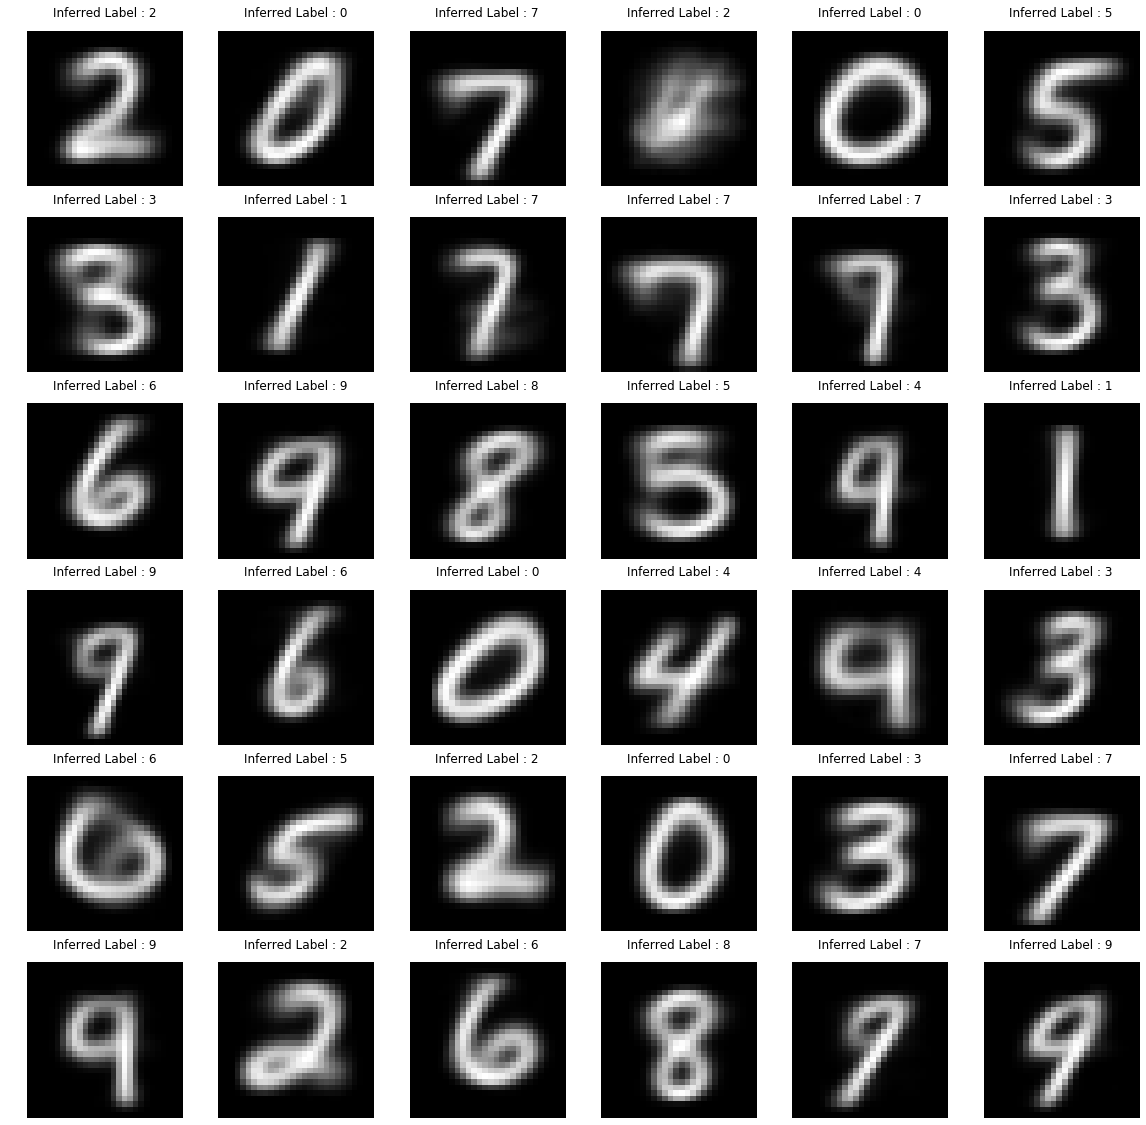

In [69]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)
cluster_labels = infer_cluster_labels(kmeans, Y)
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label : {}'.format(key))
    ax.matshow(images[i])
    ax.axis('off')
fig.show()